In [1]:
import sys
import pandas as pd
from pathlib import Path

from utils import read_or_new_pickle

In [2]:
path = Path('data')

In [27]:
cases = read_or_new_pickle(path / 'cases.pkl')

cases = pd.DataFrame(cases)

print(f"cases weight {round(sys.getsizeof(cases) / (1024 ** 3), 3)}Gb")
print(cases.shape[0])

New file has been created.
cases weight 0.0Gb
0


In [13]:
# cases['easylaw Case No.'].nunique() == cases.drop_duplicates(set(cases.columns) - set(['search_term'])).shape[0]

# # -> unique cases by 'easylaw Case No.' are equal to unique cases by all parameters except 'seatch_term'

In [14]:
cases = cases.drop_duplicates('easylaw Case No.').reset_index(drop=True)

cases['Date'] = pd.to_datetime(cases['Date'])

print(cases.shape[0])

12743


In [16]:
cases.to_csv(path / 'cases_new_3.csv', sep='\t', index=False, header=True, encoding='utf-8')

# Concatinating

In [3]:
cases = pd.read_csv(path / 'cases_base.csv', sep='\t', encoding='utf-8')

In [4]:
cases_new_batch = pd.read_csv(path / 'cases.csv', sep='\t', encoding='utf-8')

In [5]:
cases = pd.concat([cases, cases_new_batch], axis=0)
del cases_new_batch

print(f"cases weight {round(sys.getsizeof(cases) / (1024 ** 3), 3)}Gb")
print(cases.shape[0])

cases weight 5.096Gb
189932


cases weight 2.642Gb
103678


<Axes: xlabel='Date'>

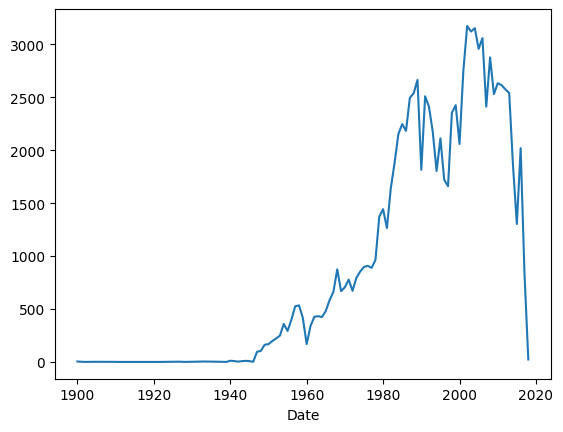

In [6]:
cases = cases.drop_duplicates('easylaw Case No.').reset_index(drop=True).sort_values('easylaw Case No.')

cases['Date'] = pd.to_datetime(cases['Date'])

print(f"cases weight {round(sys.getsizeof(cases) / (1024 ** 3), 3)}Gb")
print(cases.shape[0])

cases['Date'].dt.year.value_counts().sort_index().plot()

In [7]:
cases.to_csv(path / 'cases_base.csv', sep='\t', index=False, header=True, encoding='utf-8')

# Trying smth

In [5]:
cases = pd.read_csv(path / 'cases_base.csv', sep='\t', encoding='utf-8')

In [19]:
cases[['Journal', 'Date', 'Court', 'Judge']].value_counts()

Journal          Date        Court                  Judge                                                                                               
2007 PCrLJ 1204  2007-01-31  LAHORE HIGH COURT      MUHAMMAD FARRUKH MAHMUD AND IJAZ AHMAD CHAUDHRY                                                         4
2007 PCrLJ 1069  2007-03-19  LAHORE HIGH COURT      KHAWAJA MUHAMMAD SHARIF AND IJAZ AHMAD CHAUDHRY                                                         4
1997 PCrLJ 7     1996-04-10  LAHORE HIGH COURT      ZAHID HUSSAIN BOKHARI                                                                                   4
2006 PCrLJ 107   2005-03-11  LAHORE HIGH COURT      MIAN MUHAMMAD NAJAM-UZ-ZAMAN                                                                            4
2006 PCrLJ 110   2005-09-29  PESHAWAR HIGH COURT    SHAHZAD AKBAR KHAN AND IJAZ-UL-HASSAN KHAN                                                              4
                                                         

In [13]:
cases[(cases['Journal'] == '2015 SBLR 7860') & (cases['Date'] == '2017-01-09')]

,Journal,Court,Date,Appeal No.,Judge,Parties,Lawyers,Statutes,Judgment,easylaw Case No.,search_term
9541,2015 SBLR 7860,HIGH COURT OF SINDH (KARACHI),2017-01-09,CRIMINAL BAIL APPLICATION NO. 1500 OF 2014.,ZAFAR AHMED RAJPUT,RAWAL HAYDER KAIF APPLICANTACCUSED VERSUS ' . ...,MR. SALAHUDDIN GANDAPUR ALONGWITH SABIR SHAH* ...,CRIMINAL PROCEDURE CODE (V OF 1898) - SECTION ...,"ZAFAR AHMED RAJPUT, J.- Through instant Crimin...",1112508,belt
17020,2015 SBLR 7860,HIGH COURT OF SINDH (KARACHI,2017-01-09,C. P. NO. 3371 OF 2013,SAJJAD ALI SHAH & SHAUKAT ALI MEMON,MIR SHABBIR ALI BIJARANI & ANOTHER (PETITIONER...,MIAN NAJEEBUD-DM OWAISI VS. AAMIR YAR AND 7 OT...,CONSTITUTION OF ISLAMIC REPUBLIC OF PAKISTAN 1...,"SAJJAD ALI SIIAH, J:- The petitioner through i...",1122624,anywhere
21363,2015 SBLR 7860,HIGH COURT OF SINDH (KARACHI),2017-01-09,SUIT NO. 657 OF 2010 .,SAEED-UD-DIN NASIR,BILQEES & OTHERS PLAINTIFFS VERSUS PROVINCE OF...,"MR. KHAWAJA SHAMSUL ISLAM, ADVOCATE FOR THE PL...",CIVIL PROCEDURE CODE (V OF 1908) - ORDER XXIII...,"SYED SAEED UDDIN NASIR, J This is an applicati...",1128675,adjust
24097,2015 SBLR 7860,", HIGH COURT OF SINDH, KARACHI",2017-01-09,Appeal No.,Judge,Parties,MIR GHULAM AH ID KHCM V:.Y. PAKISTAN THROUGH S...,CONSTITUTION OF ISLAMIC REPUBLIC OF PAKISTAN 1...,"SAJJAD ALI SHAH, J: - The petitioner through i...",1132599,blouse
39996,2015 SBLR 7860,HIGH COURT OF SINDH (KARACHI,2017-01-09,H. C. ANO. 31 OF 2014,SAJJAD ALI SHAH & SHAUKAT ALI MEMON,ABDUL HAFEEZ (LATE) (APPELLANT) VERSUS PAKISTA...,"MS. RIZWAN ISMAIL, ADVOCATE FOR THE APPELLANT....",APPEAL FOR ENTITLEMENT OF ALLOTMENT APPEAL-,"SAJJAD ALI SHAH, J:- Through this appeal Order...",1156024,bother
49044,2015 SBLR 7860,HIGH COURT OF SINDH (KARACHI),2017-01-09,Appeal No.,"ABDUL RASOOL MEMON, J .",SHAKEEL AHMED (APPELLANT) VERSUS ' THE STATE (...,"SAINDAD & OTHERS V. STATE, 1972 SCMR 74RAB NAW...",PAKISTAN PENAL CODE (XLV OF 1860) - SECTION 30...,"\nABDUL RASOOL MEMON,. J:- This Criminal Appea...",1169865,accuse
55110,2015 SBLR 7860,HIGH COURT OF SINDH (KARACHI),2017-01-09,HIGH COURT APPEALS NO. 108 & 109 OF2008,"MR. JUSTICE NADEEM AKHTAR &MR, JUSTICE MUHAMMA...",ALI NOOR (PVT) LIMITED (APPELLANT) VERSUS TRAD...,MR. AGA ZAFAR AHMED ADVOCATE FOR APPELLANT .MR...,CIVIL PROCEDURE CODE (V OF 1908) - SECTION (9)...,"\nMUHAMMAD IQBAL KALIIORO, J: - While hearing ...",1179599,weight
75183,2015 SBLR 7860,HIGH COURT OF SINDH (KARACHI),2017-01-09,SUIT NO. 1108 OF 2014 ' ',MUHAMMAD SHAFI SIDDIQUI,SHABI UL HASSAN KHUSRO PLAINTIFF VERSUS .. ASA...,"MR. YOUSUF IQBAL, ADVOCATE FOR THE PLAINTIFF.M...",CIVIL PROCEDURE CODE (V OF 1908) - 0RDER 7 RUL...,The plaintiff has filed this suit for administ...,1212412,afraid
78020,2015 SBLR 7860,HIGH COURT OF SINDH (KARACHI),2017-01-09,C. P. NO. -D-2714 OF 2011,FAISAL ARAB & SALAHUDDIN PANHWAR,TAHIR WASIM YOUSUFI (PETITIONER) VERSUS PAKIST...,"CAPT (R) MUKHTAR AHMED & SABIR SHAH, ADVOCATES...",PAKISTAN ATOMIC ENERGY COMMISSION EMPLOYEES SE...,The petitioner has served as Assistant (Admin)...,1217203,scale
81263,2015 SBLR 7860,HIGH COURT OF SINDH (KARACHI,2017-01-09,SUIT NO. 1108 OF 2014,M. SHAFT SIDDIQUI,SYED SHABI UL HASSAN KHUSRO PLAINTIFF• VERSUS ...,"MR. YOUSUF IQBAL, ADVOCATE FOR THE PLAINTIFF.M...",MUSLIM FAMILY LAW ORDINANCE 1961 - SECTION 4 M...,The plaintiff has filed this suit for administ...,1222704,afraid
